In [2]:
!pip install pycaret==2.2.3

     |████████████████████████████████| 249 kB 14.0 MB/s 
     |████████████████████████████████| 76.3 MB 1.1 MB/s 
     |████████████████████████████████| 15.5 MB 48.7 MB/s 
     |████████████████████████████████| 113 kB 72.2 MB/s 
     |████████████████████████████████| 1.7 MB 69.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 6.8 MB 47.1 MB/s 
     |████████████████████████████████| 261 kB 44.9 MB/s 
     |████████████████████████████████| 2.0 MB 36.3 MB/s 
     |████████████████████████████████| 173.5 MB 9.8 kB/s 
     |████████████████████████████████| 206 kB 76.9 MB/s 
     |████████████████████████████████| 167 kB 81.4 MB/s 
     |████████████████████████████████| 62 kB 696 kB/s 
     |████████████████████████████████| 3.1 MB 65.0 MB/s 
     |███████████████

In [3]:
import pandas as pd
from pycaret.utils import enable_colab
from pycaret.classification import *
enable_colab()

Colab mode enabled.


In [4]:
data = pd.read_csv('model_df.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Columns: 234 entries, Unnamed: 0 to bucket_deltaPD
dtypes: float64(221), int64(9), object(4)
memory usage: 4.5+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 1 to 2507
Columns: 234 entries, Unnamed: 0 to bucket_deltaPD
dtypes: float64(221), int64(9), object(4)
memory usage: 4.5+ MB


In [8]:
data.head(1)

,Unnamed: 0,Unnamed: 0.1,Close/Last_gold,Volume_gold,Open_gold,High_gold,Low_gold,Close/Last_nymex_sugar,Volume_nymex_sugar,Open_nymex_sugar,High_nymex_sugar,Low_nymex_sugar,Close/Last_palladium,Volume_palladium,Open_palladium,High_palladium,Low_palladium,Close/Last_rough_rice,Volume_rough_rice,Open_rough_rice,High_rough_rice,Low_rough_rice,Close/Last_live_cattle,Volume_live_cattle,Open_live_cattle,High_live_cattle,Low_live_cattle,Close/Last_cbot_wheat,Volume_cbot_wheat,Open_cbot_wheat,High_cbot_wheat,Low_cbot_wheat,Close/Last_copper,Volume_copper,Open_copper,High_copper,Low_copper,Close/Last_soybean,Volume_soybean,Open_soybean,High_soybean,Low_soybean,Close/Last_brent_crude,Volume_brent_crude,Open_brent_crude,High_brent_crude,Low_brent_crude,Close/Last_rbob_gasoline,Volume_rbob_gasoline,Open_rbob_gasoline,High_rbob_gasoline,Low_rbob_gasoline,Close/Last_milk,Volume_milk,Open_milk,High_milk,Low_milk,Close/Last_natural_ga,Volume_natural_ga,Open_natural_ga,High_natural_ga,Low_natural_ga,Close/Last_soybean_meal,Volume_soybean_meal,Open_soybean_meal,High_soybean_meal,Low_soybean_meal,Close/Last_silver,Volume_silver,Open_silver,High_silver,Low_silver,Close/Last_heating_oil,Volume_heating_oil,Open_heating_oil,High_heating_oil,Low_heating_oil,Close/Last_lumber,Volume_lumber,Open_lumber,High_lumber,Low_lumber,Close/Last_cocoa,Volume_cocoa,Open_cocoa,High_cocoa,Low_cocoa,Close/Last_soybean_oil,Volume_soybean_oil,Open_soybean_oil,High_soybean_oil,Low_soybean_oil,Close/Last_crude_oil,Volume_crude_oil,Open_crude_oil,High_crude_oil,Low_crude_oil,Close/Last_corn,Volume_corn,Open_corn,High_corn,Low_corn,Close/Last_feeder_cattle,Volume_feeder_cattle,Open_feeder_cattle,High_feeder_cattle,Low_feeder_cattle,Close/Last_cotton,Volume_cotton,Open_cotton,High_cotton,Low_cotton,Close/Last_platinum,Volume_platinum,Open_platinum,High_platinum,Low_platinum,Close/Last_coffee,Volume_coffee,Open_coffee,High_coffee,Low_coffee,Close/Last_lean_hog,Volume_lean_hog,Open_lean_hog,High_lean_hog,Low_lean_hog,Close/Last_oat,Volume_oat,Open_oat,High_oat,Low_oat,Close/Last_red_wheat,Volume_red_wheat,Open_red_wheat,High_red_wheat,Low_red_wheat,Record Date,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,Date,delta_Open_gold,delta_Open_nymex_sugar,delta_Open_palladium,delta_Open_rough_rice,delta_Open_live_cattle,delta_Open_cbot_wheat,delta_Open_copper,delta_Open_soybean,delta_Open_brent_crude,delta_Open_rbob_gasoline,delta_Open_milk,delta_Open_natural_ga,delta_Open_soybean_meal,delta_Open_silver,delta_Open_heating_oil,delta_Open_lumber,delta_Open_cocoa,delta_Open_soybean_oil,delta_Open_crude_oil,delta_Open_corn,delta_Open_feeder_cattle,delta_Open_cotton,delta_Open_platinum,delta_Open_coffee,delta_Open_lean_hog,delta_Open_oat,delta_Open_red_wheat,diff_max_Open_gold,diff_max_Open_nymex_sugar,diff_max_Open_palladium,diff_max_Open_rough_rice,diff_max_Open_live_cattle,diff_max_Open_cbot_wheat,diff_max_Open_copper,diff_max_Open_soybean,diff_max_Open_brent_crude,diff_max_Open_rbob_gasoline,diff_max_Open_milk,diff_max_Open_natural_ga,diff_max_Open_soybean_meal,diff_max_Open_silver,diff_max_Open_heating_oil,diff_max_Open_lumber,diff_max_Open_cocoa,diff_max_Open_soybean_oil,diff_max_Open_crude_oil,diff_max_Open_corn,diff_max_Open_feeder_cattle,diff_max_Open_cotton,diff_max_Open_platinum,diff_max_Open_coffee,diff_max_Open_lean_hog,diff_max_Open_oat,diff_max_Open_red_wheat,diff_min_Open_gold,diff_min_Open_nymex_sugar,diff_min_Open_palladium,diff_min_Open_rough_rice,diff_min_Open_live_cattle,diff_min_Open_cbot_wheat,diff_min_Open_copper,diff_min_Open_soybean,diff_min_Open_brent_crude,diff_min_Open_rbob_gasoline,diff_min_Open_milk,diff_min_Open_natural_ga,diff_min_Open_soybean_meal,diff_min_Open_silver,diff_min_Open_heating_oil,diff_min_Open_lumber,diff_min_Open_cocoa,diff_min_Open_soybean_oil,diff_min_Open_crude_oil,diff

In [9]:
data.set_index("Date", inplace=True)

## Modelo 1 - Public Debt

In [10]:
labels1 = ['bucket_deltaTD', 'delta_public_debt', 'delta_total_debt', 
         'Unnamed: 0', 'Unnamed: 0.1', 'Record Date', 'Debt Held by the Public', 
         'Intragovernmental Holdings', 'Total Public Debt Outstanding', 'Source Line Number',
         'Fiscal Year', 'Fiscal Quarter Number', 'Calendar Year', 'Calendar Quarter Number',
         'Calendar Month Number', 'Calendar Day Number']
data1 = data.drop(labels=labels1, axis=1)

In [11]:
pycaret_default = setup( data1, target='bucket_deltaPD', session_id=356 )

,Description,Value
0,session_id,356
1,Target,bucket_deltaPD
2,Target Type,Multiclass
3,Label Encoded,"(-4422878400358.292, -9013197840.271]: 0, (-46..."
4,Original Data,"(2502, 217)"
5,Missing Values,False
6,Numeric Features,216
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2787,0.5911,0.2784,0.2762,0.2746,0.0981,0.0987,2.852
xgboost,Extreme Gradient Boosting,0.2770,0.5855,0.2767,0.2753,0.2739,0.0961,0.0965,18.398
rf,Random Forest Classifier,0.2718,0.5746,0.2720,0.2716,0.2682,0.0893,0.0899,1.043
gbc,Gradient Boosting Classifier,0.2673,0.5842,0.2668,0.2677,0.2657,0.0838,0.0841,11.162
catboost,CatBoost Classifier,0.2673,0.5829,0.2672,0.2638,0.2628,0.0840,0.0844,68.117
ridge,Ridge Classifier,0.2633,0.0000,0.2627,0.2641,0.2611,0.0789,0.0793,0.018
lda,Linear Discriminant Analysis,0.2621,0.5746,0.2616,0.2614,0.2599,0.0776,0.0778,0.041
et,Extra Trees Classifier,0.2610,0.5749,0.2609,0.2583,0.2570,0.0759,0.0762,0.644
ada,Ada Boost Classifier,0.2467,0.5510,0.2471,0.2492,0.2455,0.0587,0.0590,0.516
nb,Naive Bayes,0.2336,0.5405,0.2356,0.2450,0.1615,0.0443,0.0572,0.020


In [13]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=356, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [14]:
model_lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3011,0.5860,0.3009,0.3000,0.2941,0.1266,0.1281
1,0.2629,0.5896,0.2607,0.2551,0.2572,0.0776,0.0779
2,0.2171,0.5501,0.2160,0.2242,0.2180,0.0213,0.0214
3,0.2457,0.5600,0.2462,0.2429,0.2436,0.0573,0.0574
4,0.2914,0.5940,0.2905,0.2936,0.2882,0.1135,0.1143
5,0.2686,0.6043,0.2676,0.2603,0.2612,0.0854,0.0859
6,0.3257,0.6019,0.3261,0.3194,0.3200,0.1572,0.1579
7,0.3143,0.6197,0.3146,0.3168,0.3145,0.1424,0.1427
8,0.2743,0.5883,0.2750,0.2724,0.2716,0.0928,0.0931
9,0.2857,0.6171,0.2860,0.2771,0.2780,0.1073,0.1079


In [15]:
lightgbm = tune_model(model_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3125,0.5944,0.3101,0.2938,0.2982,0.1398,0.1414
1,0.2686,0.5700,0.2660,0.2582,0.2612,0.0850,0.0854
2,0.2743,0.5548,0.2735,0.2857,0.2751,0.0921,0.0928
3,0.2971,0.5624,0.2978,0.2957,0.2941,0.1211,0.1215
4,0.2686,0.5766,0.2684,0.2697,0.2679,0.0859,0.0860
5,0.2857,0.6190,0.2850,0.2914,0.2850,0.1071,0.1077
6,0.2743,0.6060,0.2754,0.2726,0.2718,0.0933,0.0935
7,0.2629,0.6081,0.2633,0.2634,0.2626,0.0782,0.0783
8,0.3429,0.6243,0.3438,0.3433,0.3419,0.1786,0.1789
9,0.2571,0.5811,0.2582,0.2511,0.2525,0.0712,0.0715


In [16]:
predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.2969,0.5901,0.2982,0.2987,0.297,0.1215,0.1217


,Volume_gold,Low_gold,Volume_nymex_sugar,Open_nymex_sugar,Close/Last_palladium,Volume_palladium,Volume_rough_rice,Volume_live_cattle,Volume_cbot_wheat,Volume_copper,Volume_soybean,Volume_brent_crude,Volume_rbob_gasoline,Volume_milk,Volume_natural_ga,Close/Last_soybean_meal,Volume_soybean_meal,Open_soybean_meal,Volume_silver,Volume_heating_oil,Volume_lumber,High_lumber,Volume_cocoa,Open_cocoa,Volume_soybean_oil,Volume_crude_oil,Volume_corn,Close/Last_feeder_cattle,Volume_feeder_cattle,Volume_cotton,Volume_platinum,Volume_coffee,Volume_lean_hog,Volume_oat,Volume_red_wheat,delta_Open_gold,delta_Open_nymex_sugar,delta_Open_palladium,delta_Open_cbot_wheat,delta_Open_soybean,...,diff_max_Open_soybean_oil,diff_max_Open_crude_oil,diff_max_Open_corn,diff_max_Open_feeder_cattle,diff_max_Open_cotton,diff_max_Open_platinum,diff_max_Open_coffee,diff_max_Open_lean_hog,diff_max_Open_oat,diff_max_Open_red_wheat,diff_min_Open_gold,diff_min_Open_nymex_sugar,diff_min_Open_palladium,diff_min_Open_rough_rice,diff_min_Open_live_cattle,diff_min_Open_cbot_wheat,diff_min_Open_copper,diff_min_Open_soybean,diff_min_Open_brent_crude,diff_min_Open_rbob_gasoline,diff_min_Open_milk,diff_min_Open_natural_ga,diff_min_Open_soybean_meal,diff_min_Open_silver,diff_min_Open_heating_oil,diff_min_Open_lumber,diff_min_Open_cocoa,diff_min_Open_soybean_oil,diff_min_Open_crude_oil,diff_min_Open_corn,diff_min_Open_feeder_cattle,diff_min_Open_cotton,diff_min_Open_platinum,diff_min_Open_coffee,diff_min_Open_lean_hog,diff_min_Open_oat,diff_min_Open_red_wheat,bucket_deltaPD,Label,Score
0,238804.0,1314.000000,354.000000,0.1273,1501.500000,4442.000000,278.000000,414.0,60088.000000,67136.0,76062.000000,1028.0,50272.0,659.0,106339.0,306.000000,48603.000000,308.299988,62988.0,46302.0,402.0,396.500000,378.000000,2247.0,45776.0,485958.0,23044.0,146.149994,7732.0,402.000000,22253.0,402.000000,14583.0,603.0,32746.0,-0.004540,-0.014140,-0.028675,-0.000534,-0.001092,...,0.25,0.43,1.00,0.000,0.000,8.700000,0.0,1.175,3.75,2.75,-7.7,0.0000,-6.800000,-0.035,-1.125,-10.25,-0.0280,-6.25,-0.57,-0.0168,-0.06,-0.021,-2.6,-0.165,-0.0181,-4.3,0.0,-0.03,-0.57,-2.50,-1.900,0.0000,-5.8,0.0000,-0.250,-4.75,-4.75,"(2006330681.0, 4215724799917.699]","(-4422878400358.292, -9013197840.271]",0.4413
1,451237.0,1309.500000,288.000000,0.1267,986.450012,4179.000000,336.000000,23397.0,76296.000000,116894.0,90316.000000,39135.0,62000.0,247.0,117691.0,364.500000,44829.000000,362.500000,107191.0,61095.0,288.0,489.600006,288.000000,2524.0,78700.0,743982.0,140380.0,136.949997,5552.0,288.000000,21627.0,184.666672,19288.0,721.0,32176.0,-0.004502,0.008682,-0.008395,0.002205,0.007042,...,0.79,1.83,0.75,0.450,0.000,16.299999,0.0,0.925,0.00,0.25,-1.1,0.0000,-4.050000,-0.020,-2.450,-6.75,-0.0235,-4.75,-0.09,-0.0051,-0.06,-0.043,-1.3,-0.010,-0.0014,-6.6,0.0,-0.09,-0.14,-1.25,-1.900,0.0000,-0.7,0.0000,-0.550,-8.25,-11.75,"(-4422878400358.292, -9013197840.271]","(-604475436.322, -46056584.598]",0.5183
2,177682.0,1342.000000,88.888885,0.2042,709.349976,3900.000000,850.000000,1473.0,56668.000000,11717.0,83008.000000,25168.0,58084.0,304.0,116753.0,330.799988,32632.000000,326.299988,78120.0,34686.0,257.0,323.500000,3.000000,3088.0,50250.0,115707.0,75930.0,141.550003,2345.0,6.000000,8704.0,88.666664,13375.0,359.0,17660.0,0.002432,0.031832,0.023450,0.000000,0.000000,...,0.07,0.42,2.25,1.125,0.000,1.800000,0.0,1.875,2.25,5.50,-15.1,0.0000,-7.550000,-0.010,-0.925,-5.00,-0.0070,-6.50,-0.55,-0.0176,-0.03,-0.091,-1.5,-0.555,-0.0214,-1.8,0.0,-0.52,-0.40,-2.50,-0.950,-0.0002,-23.4,0.0000,-0.250,0.00,-2.25,"(-604475436.322, -46056584.598]","(-604475436.322, -46056584.598]",0.3962
3,115505.0,1760.400024,6.000000,0.2129,649.900024,2304.000000,4.000000,123.0,284.000000,38472.0,1662.000000,315.0,37146.0,173.0,160092.0,463.299988,237.000000,462.700012,35244.0,52869.0,35.0,281.100006,1.000000,2370.0,2276.0,269304.0,2601.0,146.449997,13.0,10.000000,8567.0,1.000000,55.0,10.0,381.5,-0.006682,-0.005167,0.001899,0.006322,-0.016251,...,0.10,1.40,0.00

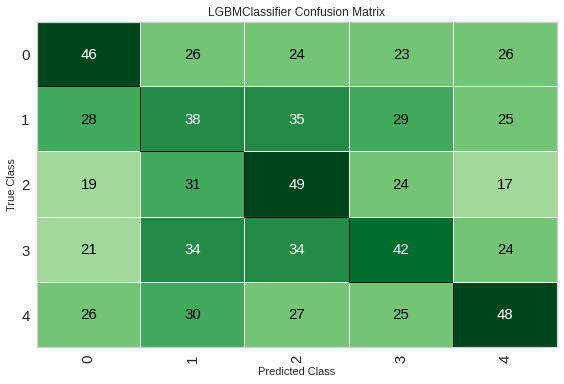

In [17]:
plot_model( lightgbm, plot='confusion_matrix' )